# Testing Models (Lesson 6)

Recall distinction between regression and classificaion 
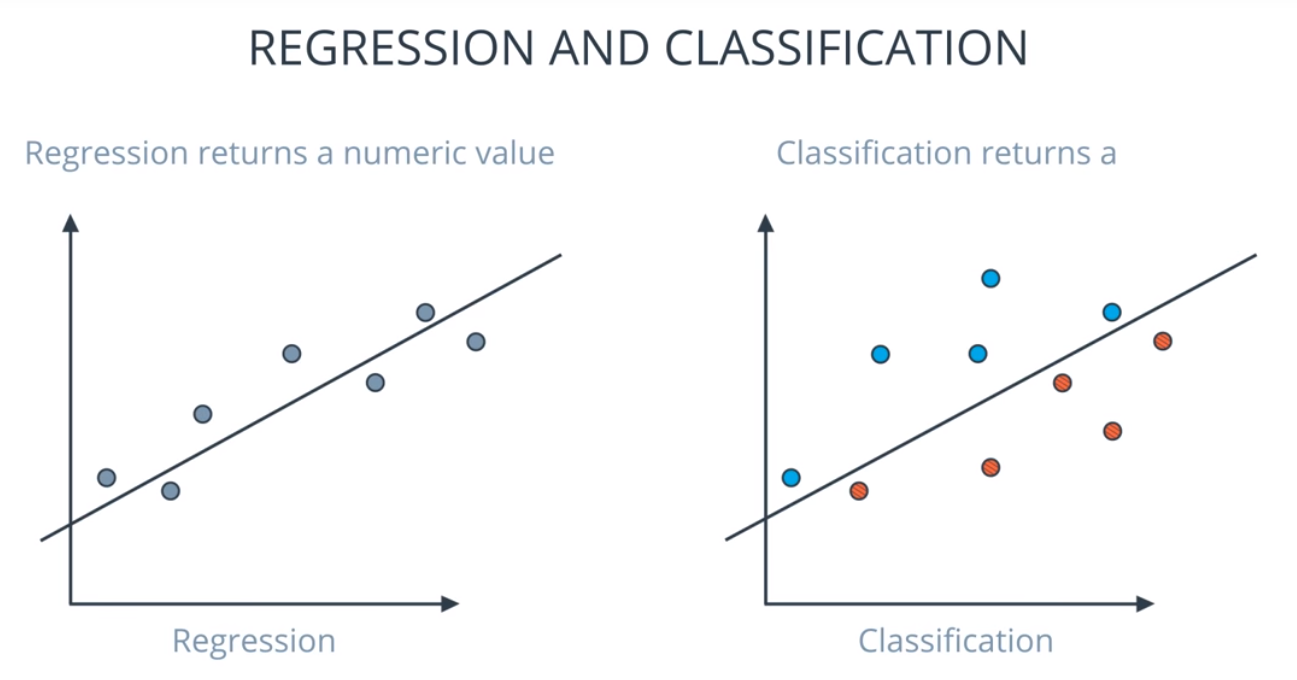

**The question is, which model fits better?**
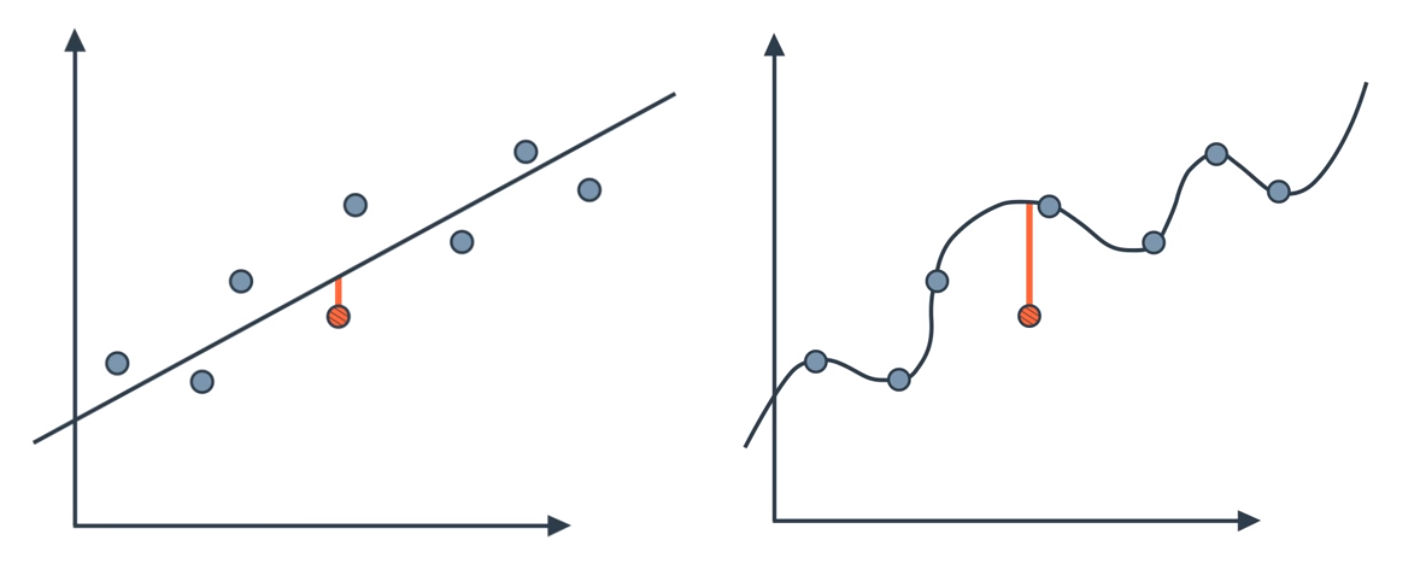
The model on left is better. It generalisies better, while the model on the right overfits the data.This is done by looking at the cumulatative error of all the data points (the red lines)

## Testing on regresion

Split the data into 2 sets, training and test. We then train on the training set and then test on the test set. We can then determine that the model on the right has a smaller error.
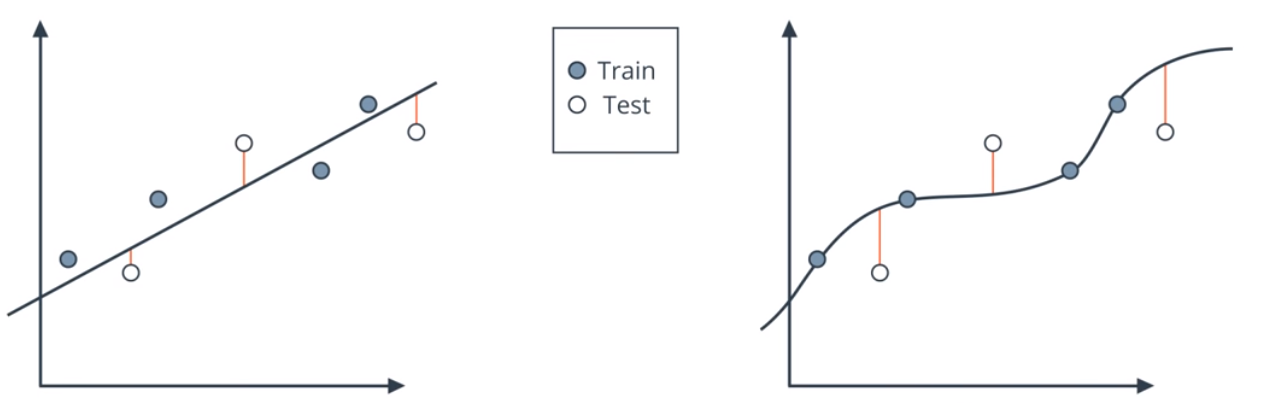

## Testing on classification models

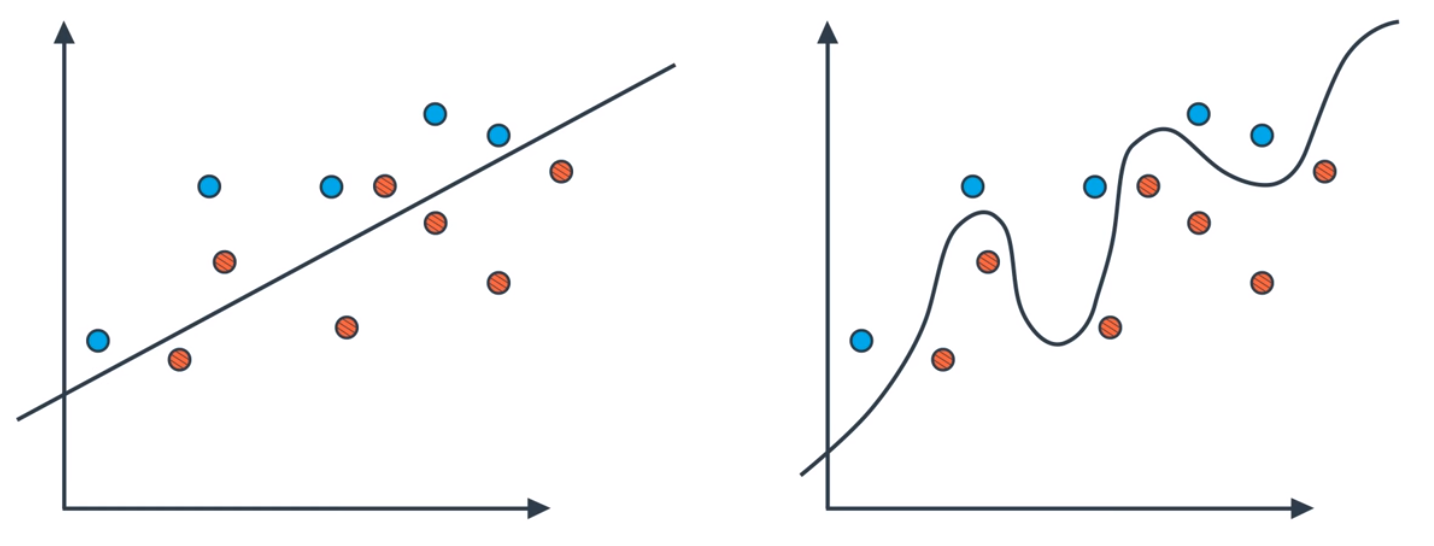
Discousion of image:
The the model on the left might fit the data in a more generalised maner as it treats the outliers as noise. 

Here we create a training and test set again. 
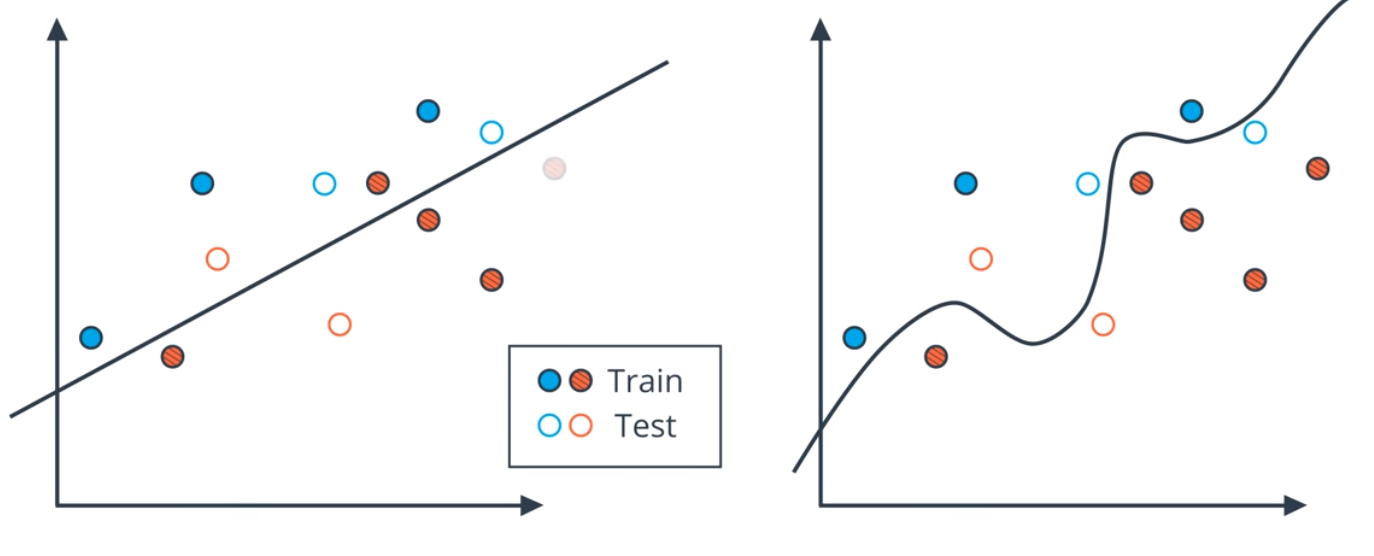
Looking at the test set results. The model on the left make less mistakes then on the right

## Example SKLearn

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

SyntaxError: invalid syntax (<ipython-input-2-77d864a23e9c>, line 1)

## Quiz

In [4]:
# Reading the csv file
import pandas as pd
data = pd.read_csv("data/testing_models.csv")

# Splitting the data into X and y
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Import statement for train_test_split
from sklearn.cross_validation import train_test_split

# TODO: Use the train_test_split function to split the data into
# training and testing sets.
# The size of the testing set should be 20% of the total size of the data.
# Your output should contain 4 objects.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Golden Rule

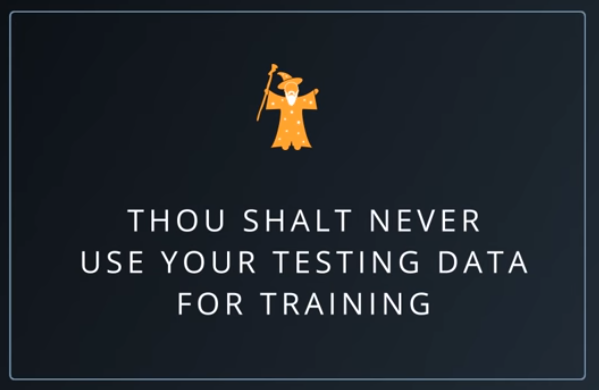

# Evaluation Metrics (Lesson 7)

## Confusion Matrix

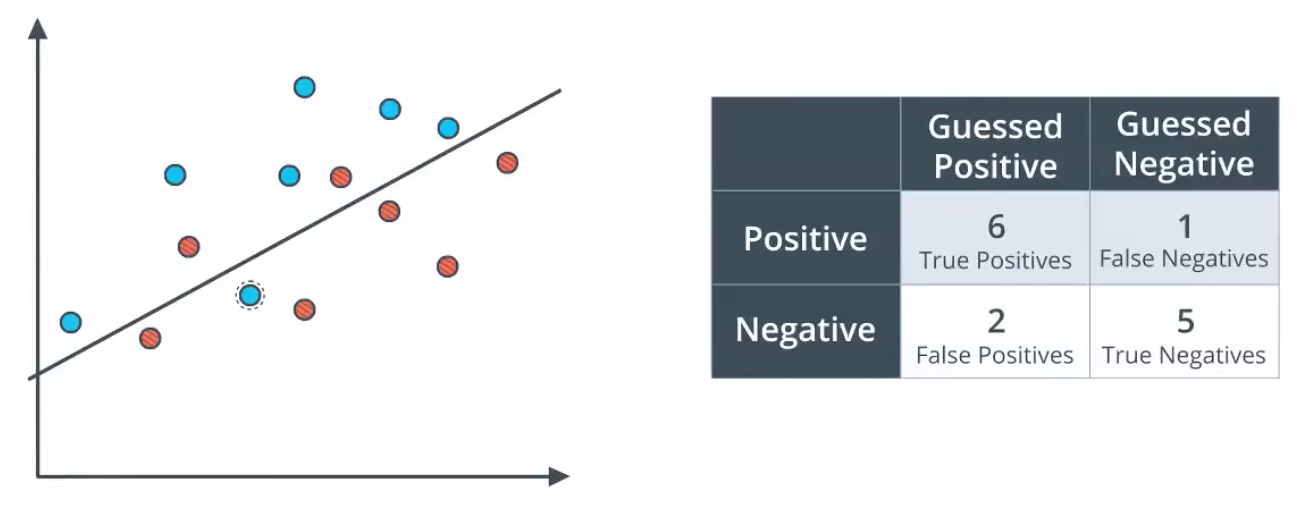

##  Accuracy 

**Out of all the outcomes, how many did we classify correcty?**

$\text{Acc} = \frac{\text{TP} + \text{TN}}{\text{TP + TN + FP + FN}}$

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

**NOTE:** Accuracy isn't always the best metric to use when dealing with skewed data.

Example: Say we have 980 non spam emails and 10 spam emails. If our classifier were to predict all the emails to be non-spam then we would have an accuracy of 98%! But we are infact missing all the spam emails being sent to us. A way to get around this is looking at precision and recall.

## Precision

** Out of all the outcomes we predicted with a positive how many did we predict correctly? ** (w.r.t our guesses, how good were our predictions?)



$$ \text{precision} = \frac{\text{TP}}{\text{TP + FP}}$$

Example:
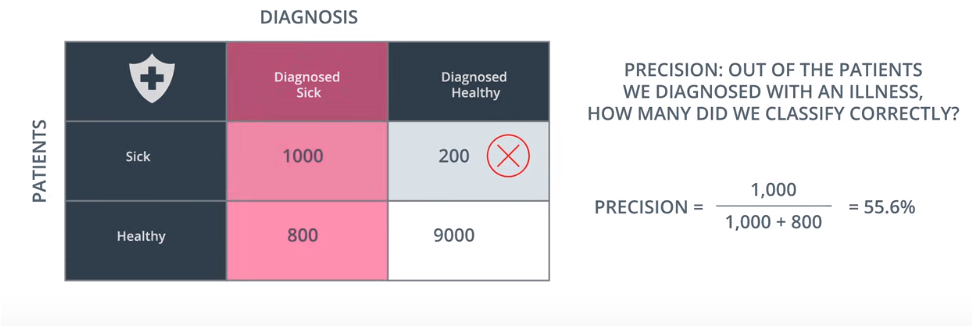

## Recall

**Out all the positive points, how many did we correctly predict as positive?** (w.r.t to the actual results, how good were our predictions?)

$$ \text{recall} = \frac{\text{TP}}{\text{TP + FN}}$$

Example:
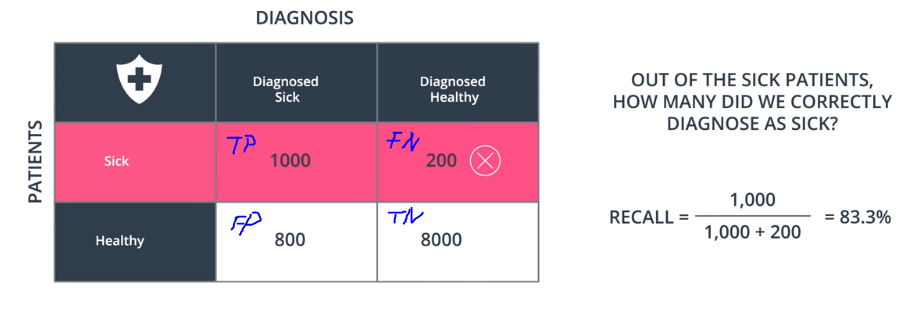

## F1 Score

How can we take the recall and precision and combine it into a single score? We can use the harmonic mean, (a good method for finding the averages of rates). The harmonic mean in the context of recall and precision is known as the **F1 Score**

$$ \text{F1} = 2 \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Intuition:
The harmonic mean is always less then the arithmetic mean.
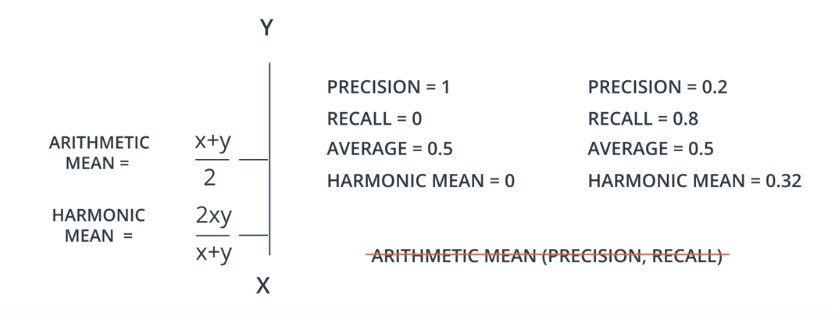

## $F_\beta$ Score

If we want either precision or recall to hold more weight in the F Score.

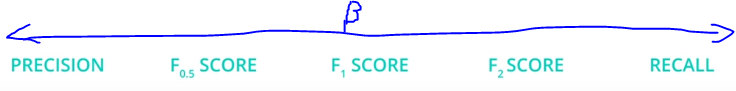

$$ F_\beta \text{ Score}= (1+\beta^2) \frac{\text{Precision} \times \text{Recall}}{\beta^2\text{Precision} + \text{Recall}}$$

The boundaries of $F_\beta$ are:
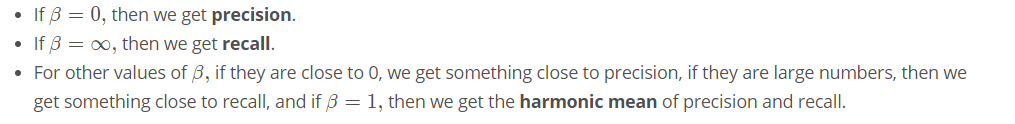

### Example

Out of the following three models, which one should have an F-beta score of 2, 1, and 0.5? Match each model with its corresponding score.

* Detecting malfunctioning parts in a spaceship
* Sending phone notifications about videos a user may like
* Sending promotional material in the mail to potential clients

* For the spaceship model, we can't really afford any malfunctioning parts, and it's ok if we overcheck some of the parts that are working well. Therefore, this is a high recall model, so we associate it with beta = 2.

* For the notifications model, since it's free to send them, we won't get harmed too much if we send them to more people than we need to. But we also shouldn't overdo it, since it will annoy the users. We also would like to find as many interested users as we can. Thus, this is a model which should have a decent precision and a decent recall. Beta = 1 should work here.

* For the Promotional Material model, we since it costs us to send the material, we really don't want to send it to many people that won't be interested. Thus, this is a high precision model. Thus, beta = 0.5 will work here.

## ROC Curve (Receiver Operating Characteristic)

Is there a way we can score how good a model model seperates our data? Yes -> ROC

We define our ROC  curve by the following equations and by moving around our split location to find new points on the curve.
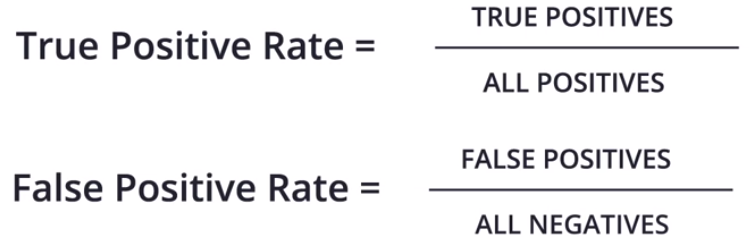

##### And use the **area under the curve as a score metric** to determine how good our model "splits the data". 

The area goes from 0 to 1 where:
* 0.5 - random split
* 0.8 - good split
* 1 - perfect split

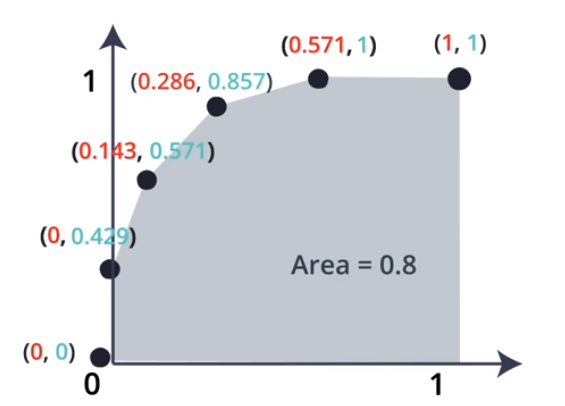

Moving our split location around:
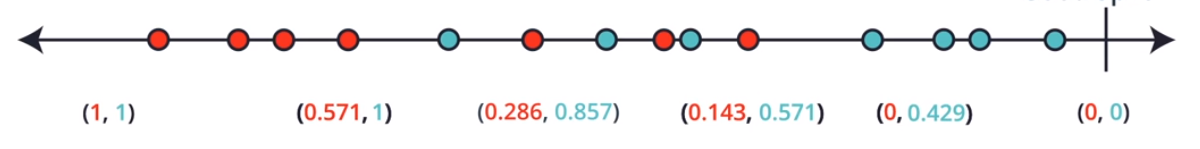

To summaries how well our splits split the data and their corresponding ROC curves:

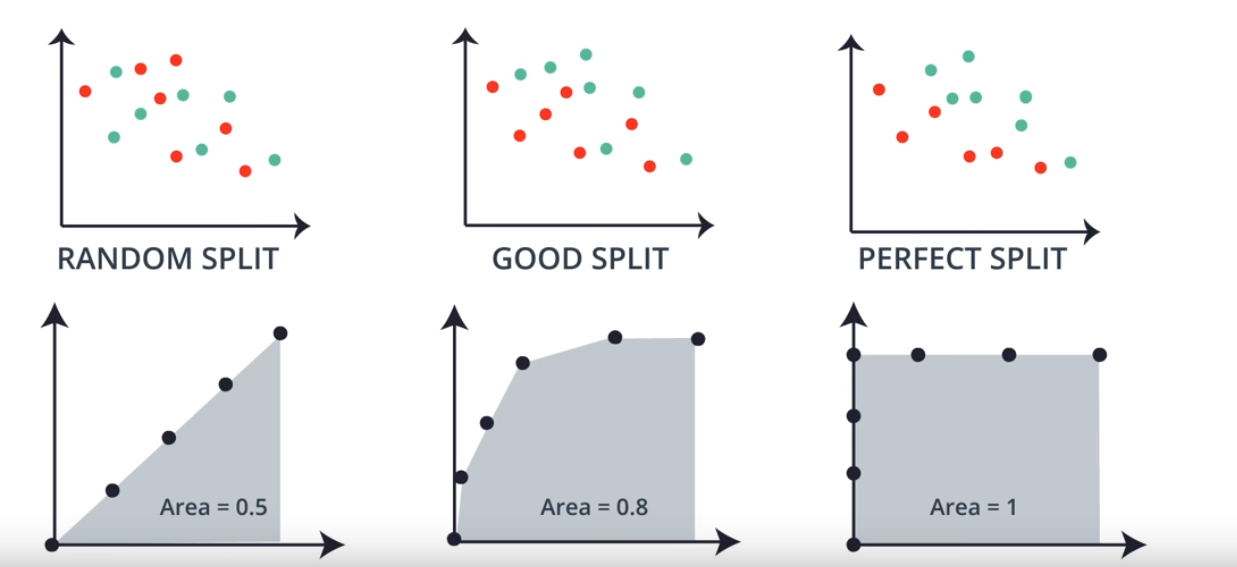

**NOTE** That we can get an area of less then 0.5 - in cases where we have more red points in the blue area and vice versa for the blue points.

## Metrics to evaluate Regresion

### Mean Abs Error

Add the abs distances (orange lines) of the points and the models function.
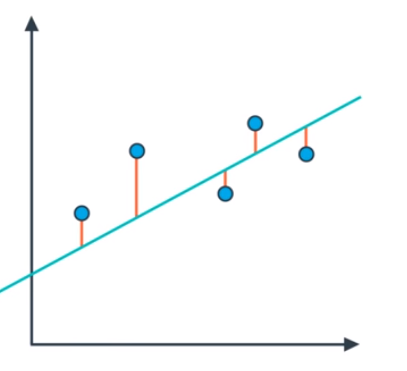

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.learn_model import LinearRegression

classifier = LinearRegression()
classifier.fit(X,y)

guesses = classifier.predict(X)

error = mean_absolute_error(y, guesses)

There is a prolbmel. The mean abs error isnt differentiable. WHich is a problem for such optimisation algorithms like gradient desecent. This is where Mean squared error comes in. 

### Mean Square Error

Add the squared distances of our points from the regression line.
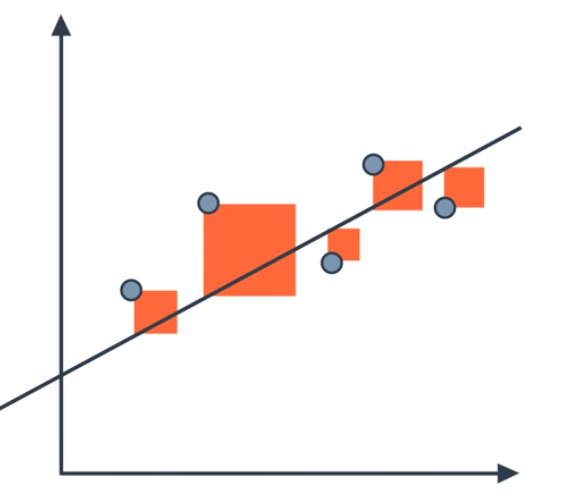

In [ ]:
from sklearn.metrics import mean_square_error
from sklearn.learn_model import LinearRegression

classifier = LinearRegression()
classifier.fit(X,y)

guesses = classifier.predict(X)

error = mean_squre_error(y, guesses)

### R2 Score

Comparing our model to the simplest model and running Mean Square Error on both models to compare.

$$R2 = 1 - \frac{\text{trained model error}}{\text{simple model error}}$$


**Example**
Taking the average of all the values to determine the simple model.

The blue diagram is the simple model and the orange model is the trained model.
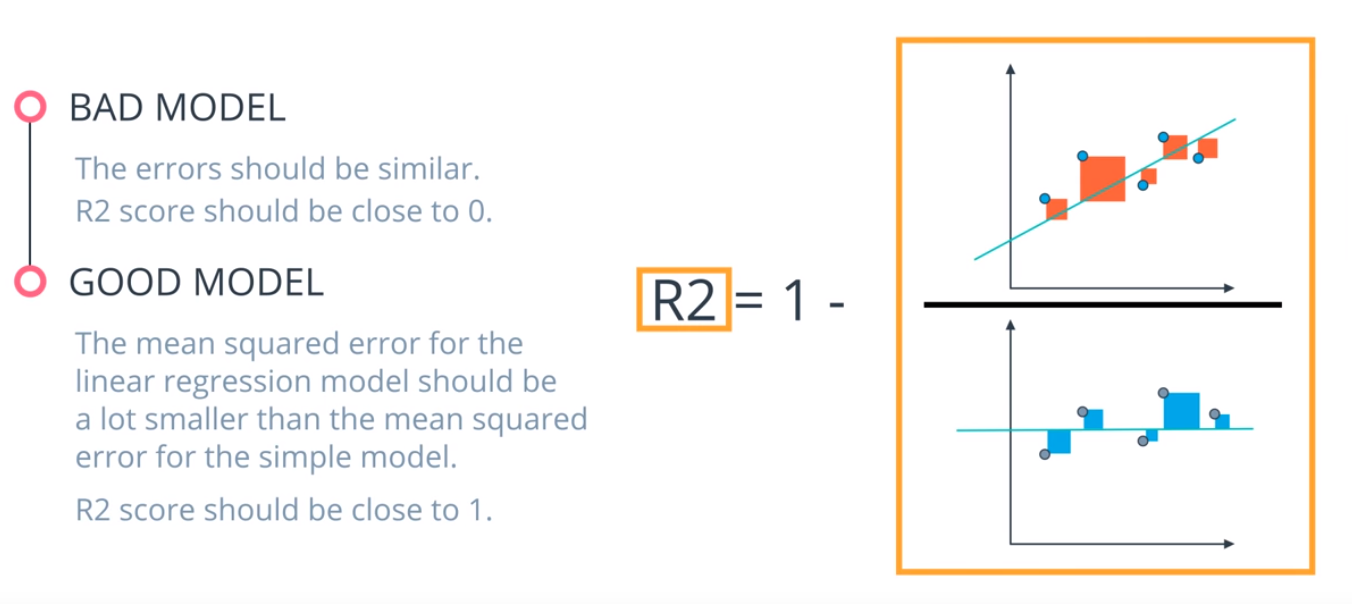

In [ ]:
from sklearn.metrics import r2_score

y_true = [1,2,4]
y_pred = [1.3,2.5,3.7]

r2_score(y_true,y_pred)